<a target="_blank" href="https://colab.research.google.com/github/Sebelino/DD2424-project/blob/main/e1_sebastian.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [5]:
%load_ext autoreload
%autoreload 2

import os
import socket

repo_name = "DD2424-project"
dep_filename = "download_dataset.py"
cwd = os.getcwd()
hostname = socket.gethostname()

print(f"Host: {hostname}")
print(f"You are here: {cwd}")

if os.path.exists(dep_filename):
    print(f"{dep_filename} is in your current directory. Assuming you are in the root of the repository.")
elif not os.path.exists(repo_name):
    print(f"Cloning repo and fetching {dep_filename}...")
    !git clone https://github.com/Sebelino/DD2424-project
    !cp DD2424-project/download_dataset.py .
else:
    !git -C DD2424-project pull --rebase
    !cp DD2424-project/download_dataset.py .

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Host: deeplearning-vm
You are here: /home/sebelino/pycharm_deployment
download_dataset.py is in your current directory. Assuming you are in the root of the repository.


# Train model

In [33]:
%reload_ext autoreload
%autoreload 2

from determinism import Determinism

determinism = Determinism(seed=42).sow()  # Keep this before any torch import

from training import TrainParams, NagParams, AdamParams
from evaluation import evaluate_test_accuracy_and_misclassified, \
    evaluate_with_train_val_plot, run_with_different_seeds, run_comparison
from run import run

baseline_params = TrainParams(
    seed=determinism.seed,
    batch_size=32,
    architecture="resnet18",
    n_epochs=10,
    optimizer=NagParams(
        learning_rate=0.01,
        weight_decay=1e-4,
        momentum=0.9,
    ),
    freeze_layers=True,
    unfreezing_epochs=(3, 6),
    validation_freq=1,
    time_limit_seconds=None,
    val_acc_target=None,
)

invalidate_cache_entry = False
if invalidate_cache_entry:
    run.call_and_shelve(baseline_params).clear()

# First plot: Training and validation accuracy
print("Training with params:")
print(baseline_params.pprint())
result = run(baseline_params)

print("Training result:")
print(result.pprint())
evaluate_with_train_val_plot(result)

# Second plot: Rerun training multiple times with different seed
run_with_different_seeds(baseline_params, trials=2)

# Third plot: Compare NAG with Adam
experimental_params = baseline_params.copy()
experimental_params.optimizer = AdamParams(
    learning_rate=0.001,
    weight_decay=1e-4,
)

param_sets = {
    "Baseline (NAG)": baseline_params,
    "Experiment (Adam)": experimental_params,
}

run_comparison(param_sets, trials=3)


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Batch:   0%|          | 0/92 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch [1/10], Loss: 1.2910, Train Acc: 67.39%, Val Acc: 85.60%
Epoch [2/10], Loss: 0.3830, Train Acc: 89.74%, Val Acc: 89.67%
Epoch [3/10], Loss: 0.3359, Train Acc: 89.33%, Val Acc: 87.91%
Epoch [4/10], Loss: 0.0752, Train Acc: 98.54%, Val Acc: 91.30%
Epoch [5/10], Loss: 0.0274, Train Acc: 99.63%, Val Acc: 90.49%
Epoch [6/10], Loss: 0.0117, Train Acc: 100.00%, Val Acc: 91.85%
Epoch [7/10], Loss: 0.0073, Train Acc: 100.00%, Val Acc: 91.85%
Epoch [8/10], Loss: 0.0076, Train Acc: 99.93%, Val Acc: 92.39%
Epoch [9/10], Loss: 0.0066, Train Acc: 99.93%, Val Acc: 91.58%
Epoch [10/10], Loss: 0.0054, Train Acc: 99.97%, Val Acc: 92.26%
Elapsed for all epochs: 135.00s, average per epoch: 13.40s, average per batch: 0.12s
Training with params:
{
  "seed": 42,
  "batch_size": 32,
  "architecture": "resnet18",
  "optimizer": {
    "learning_rate": 0.01,
    "weight_decay": 0.0001,
    "momentum": 0.9,
    "name": "nag"
  },
  "n_epochs": 10,
  "freeze_layers": true,
  "unfreezing_epochs": [3, 6],
  "v

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Batch:   0%|          | 0/92 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch [1/10], Loss: 1.2477, Train Acc: 69.02%, Val Acc: 85.60%
Epoch [2/10], Loss: 0.3873, Train Acc: 89.95%, Val Acc: 87.77%
Epoch [3/10], Loss: 0.3134, Train Acc: 90.35%, Val Acc: 88.99%
Epoch [4/10], Loss: 0.0846, Train Acc: 98.00%, Val Acc: 89.81%
Epoch [5/10], Loss: 0.0249, Train Acc: 99.86%, Val Acc: 92.26%
Epoch [6/10], Loss: 0.0139, Train Acc: 99.90%, Val Acc: 91.44%
Epoch [7/10], Loss: 0.0072, Train Acc: 100.00%, Val Acc: 91.98%


KeyboardInterrupt: 

# Test model

Training with params:
{
  "seed": 42,
  "batch_size": 32,
  "architecture": "resnet18",
  "optimizer": {
    "learning_rate": 0.01,
    "weight_decay": 0.0001,
    "momentum": 0.9,
    "name": "nag"
  },
  "n_epochs": 3,
  "freeze_layers": true,
  "unfreezing_epochs": [3, 6],
  "validation_freq": 1
}


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Batch:   0%|          | 0/92 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/23 [00:00<?, ?it/s]

Elapsed for all epochs: 40.98s, average per epoch: 13.52s, average per batch: 0.12s
Test size: 3669


Evaluating:   0%|          | 0/115 [00:00<?, ?it/s]

Final Test Accuracy: 84.11%
Number of misclassified samples: 583


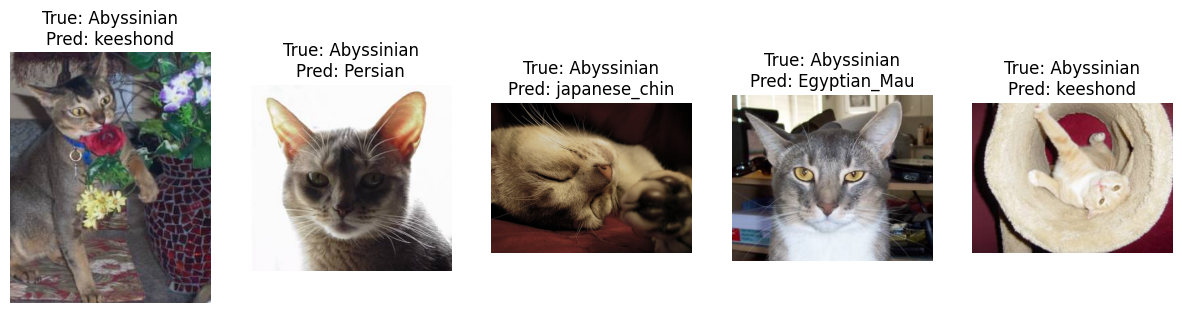

Copied 583 misclassified images to ./misclassified


In [30]:
from run import make_trainer
from torch.utils.data import DataLoader
from training import Trainer
from datasets import load_dataset

training_params = baseline_params

print("Training with params:")
print(training_params.pprint())
trainer, train_loader, val_loader = make_trainer(training_params)
trainer.train(train_loader, val_loader)

test_dataset = load_dataset("test", Trainer.make_transform(training_params))
test_loader = DataLoader(
    test_dataset,
    batch_size=training_params.batch_size,
    shuffle=False,
    num_workers=2,
    worker_init_fn=Determinism.data_loader_worker_init_fn(training_params.seed),
)
print(f"Test size: {len(test_loader.dataset)}")

evaluate_test_accuracy_and_misclassified(trainer, test_loader, test_dataset)
